# Time Series 

1. Simple Moving Average 
2. Cumulative Moving Average
3. Expotential Weight Average
4. Auto Regressive Model (AR)
5. Moving Average Formula (MA)

### AR + MA = ARMA or ARIMA

In [3]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [4]:
df = pdr.get_data_alphavantage("TSLA",api_key ='gdi6RV7GeU_SikJ4hZgOerx1bUHpVT7O')
df

,open,high,low,close,volume
2010-06-29,19.00,25.0000,17.54,23.89,18766300
2010-06-30,25.79,30.4192,23.30,23.83,17187100
2010-07-01,25.00,25.9200,20.27,21.96,8218800
2010-07-02,23.00,23.1000,18.71,19.20,5139800
2010-07-06,20.00,20.0000,15.83,16.11,6866900
...,...,...,...,...,...
2023-10-31,196.12,202.8000,194.07,200.84,118068273
2023-11-01,204.04,205.9900,197.85,205.66,121661656
2023-11-02,212.97,219.2000,211.45,218.51,125987621
2023-11-03,221.15,226.3701,218.40,219.96,119534790


# Simple Moving Average(SMA)

<AxesSubplot:>

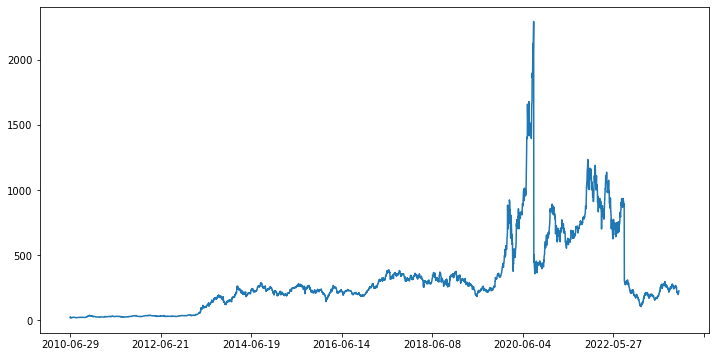

In [5]:
df['open'].plot(figsize = (12,6))

In [21]:
df1 = df.reset_index()

df1.rename(columns={
    'index':'date'
}, inplace = True)

In [22]:
df1

,date,open,high,low,close,volume
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900
...,...,...,...,...,...,...
3358,2023-10-31,196.12,202.8000,194.07,200.84,118068273
3359,2023-11-01,204.04,205.9900,197.85,205.66,121661656
3360,2023-11-02,212.97,219.2000,211.45,218.51,125987621
3361,2023-11-03,221.15,226.3701,218.40,219.96,119534790


In [27]:
df2 = df1.set_index('date')

In [28]:
df2['new_open'] = df2['open'].rolling( window=10,min_periods=1).mean()

In [29]:
df2.head(12)

,open,high,low,close,volume,new_open
date,,,,,,
2010-06-29,19.0000,25.0000,17.5400,23.89,18766300,19.000000
2010-06-30,25.7900,30.4192,23.3000,23.83,17187100,22.395000
2010-07-01,25.0000,25.9200,20.2700,21.96,8218800,23.263333
2010-07-02,23.0000,23.1000,18.7100,19.20,5139800,23.197500
2010-07-06,20.0000,20.0000,15.8300,16.11,6866900,22.558000
2010-07-07,16.4000,16.6300,14.9800,15.80,6921700,21.531667
2010-07-08,16.1400,17.5200,15.5700,17.46,7711400,20.761429
2010-07-09,17.5800,17.9000,16.5500,17.40,4050600,20.363750
2010-07-12,17.9500,18.0700,17.0000,17.05,2202500,20.095556


<AxesSubplot:xlabel='date'>

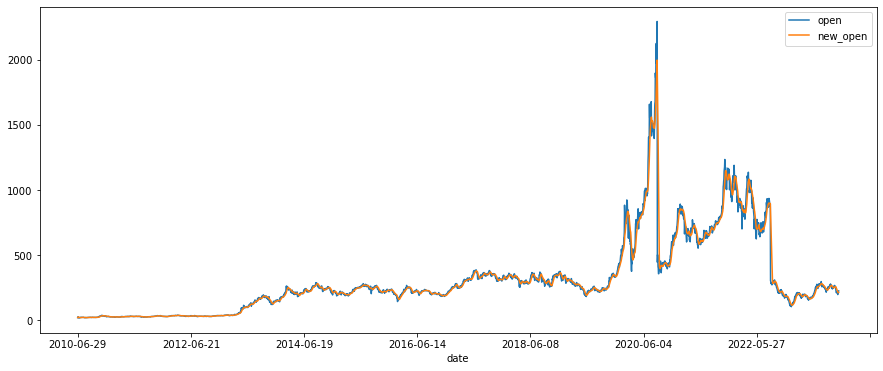

In [30]:
df2[['open','new_open']].plot(figsize=(15,6))

In [31]:
df1

,date,open,high,low,close,volume
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900
...,...,...,...,...,...,...
3358,2023-10-31,196.12,202.8000,194.07,200.84,118068273
3359,2023-11-01,204.04,205.9900,197.85,205.66,121661656
3360,2023-11-02,212.97,219.2000,211.45,218.51,125987621
3361,2023-11-03,221.15,226.3701,218.40,219.96,119534790


# Cumulative Moving Average(CMA)

<AxesSubplot:xlabel='date'>

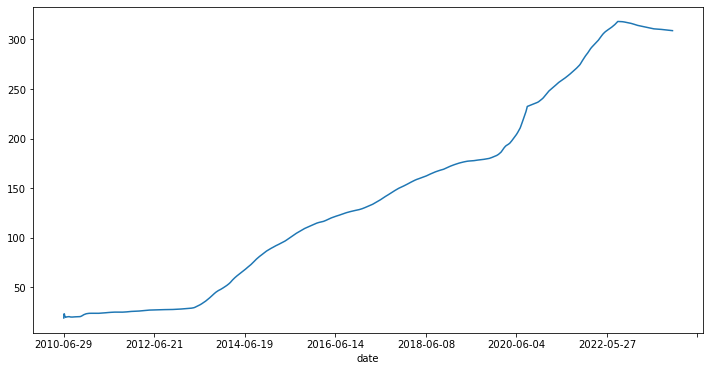

In [41]:
# Expanding
df2['open'].expanding().mean().plot(figsize=(12,6))

In [42]:
df2['cumulative open'] = df2['open'].expanding().mean()
df2

,open,high,low,close,volume,new_open,cumulative open
date,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300,19.000000,19.000000
2010-06-30,25.79,30.4192,23.30,23.83,17187100,22.395000,22.395000
2010-07-01,25.00,25.9200,20.27,21.96,8218800,23.263333,23.263333
2010-07-02,23.00,23.1000,18.71,19.20,5139800,23.197500,23.197500
2010-07-06,20.00,20.0000,15.83,16.11,6866900,22.558000,22.558000
...,...,...,...,...,...,...,...
2023-10-31,196.12,202.8000,194.07,200.84,118068273,216.536000,308.952703
2023-11-01,204.04,205.9900,197.85,205.66,121661656,211.670000,308.921479
2023-11-02,212.97,219.2000,211.45,218.51,125987621,210.372000,308.892930


## EMA(Exponential Moving Average)
### ema = t * k + y*(1-k)
### t = time
### k = 2/(N+1)
### N = Number of periods
### y = previous EMA values

In [43]:
df2['open EMA'] = df2['open'].ewm(alpha=0.1, adjust=False).mean()

In [44]:
df2

,open,high,low,close,volume,new_open,cumulative open,open EMA
date,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300,19.000000,19.000000,19.000000
2010-06-30,25.79,30.4192,23.30,23.83,17187100,22.395000,22.395000,19.679000
2010-07-01,25.00,25.9200,20.27,21.96,8218800,23.263333,23.263333,20.211100
2010-07-02,23.00,23.1000,18.71,19.20,5139800,23.197500,23.197500,20.489990
2010-07-06,20.00,20.0000,15.83,16.11,6866900,22.558000,22.558000,20.440991
...,...,...,...,...,...,...,...,...
2023-10-31,196.12,202.8000,194.07,200.84,118068273,216.536000,308.952703,227.714767
2023-11-01,204.04,205.9900,197.85,205.66,121661656,211.670000,308.921479,225.347290
2023-11-02,212.97,219.2000,211.45,218.51,125987621,210.372000,308.892930,224.109561


<AxesSubplot:xlabel='date'>

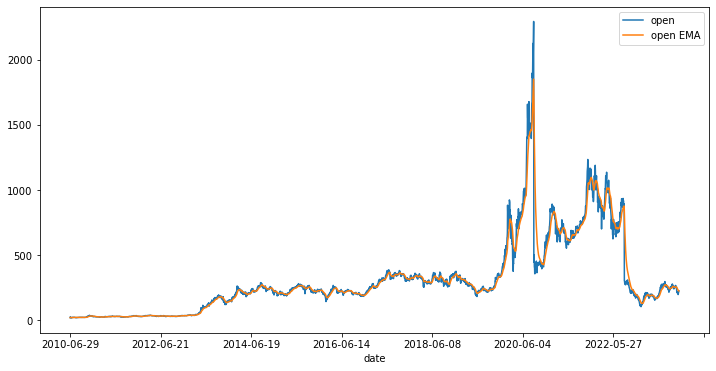

In [53]:
df2[['open','open EMA']].plot(figsize=(12,6))

## EWMA(Exponential Weighted Moving Average)

In [56]:
df2['open EWMA'] = df2['open'].ewm(span=5).mean()

<AxesSubplot:xlabel='date'>

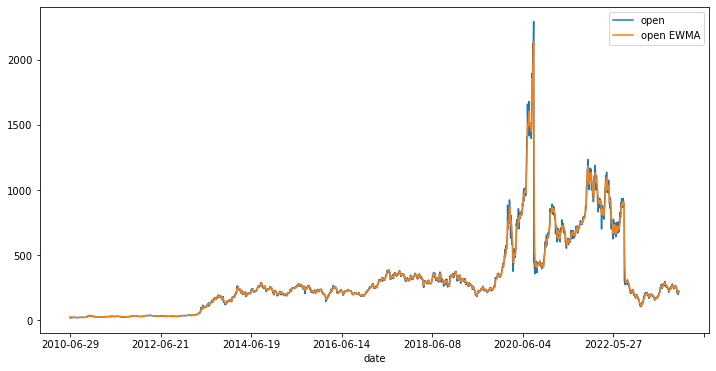

In [57]:
df2[['open','open EWMA']].plot(figsize=(12,6))